# Reference
https://medium.com/eatpredlove/natural-cubic-splines-implementation-with-python-edf68feb57aa

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

9.39567 1.3212


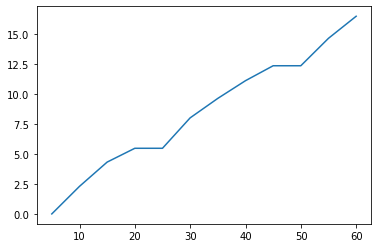

In [2]:
readfile = open("CameraPath_20Hz.txt", 'r')
lines = readfile.readlines()

x0 = float(lines[0].split('\n')[0].split(',')[1])
y0 = float(lines[0].split('\n')[0].split(',')[2])
print(x0, y0)

xs = []
ys = []
ts = []

sampling_freq = 100

cnt = 0
for line in lines:
    cnt +=1
    item = line.split('\n')[0].split(',')
    time, x, y, z, w, rx, ry, rz = item
    if cnt%sampling_freq == 0:
        ts.append(float(time))
        xs.append(-(float(x)-x0))
        ys.append(-(float(y)-y0))
plt.plot(ts, xs)

In [3]:
from cubic_spline_class import cubic_spliner
cubic_spliner_obejct = cubic_spliner()

In [4]:
total_time = ts[len(ts)-1] -ts[0]
time = []
q = []
dq = []
ddq = []

b, c, d = cubic_spliner_obejct.cubic_spline(ts, xs, 0)
for i in zip(b, c, d):
    print("{:.3f}, {:.3f}, {:.3f}".format(i[0], i[1], i[2]))

Jacobi Method Output:
Number of Iterations:  51
Norm of Difference:  0.0
0.468, 0.000, -0.000
0.440, -0.006, -0.000
0.361, -0.010, -0.003
0.020, -0.058, 0.011
0.251, 0.104, -0.011
0.497, -0.055, 0.004
0.258, 0.008, -0.000
0.330, 0.007, -0.005
0.052, -0.062, 0.010
0.207, 0.093, -0.009
0.490, -0.037, 0.002


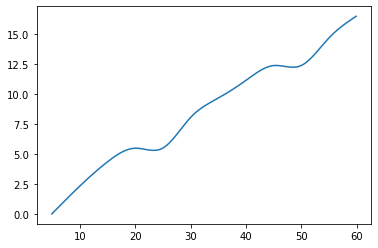

In [5]:
for i in range(1000):
    t = total_time/1000.0*i+ts[0]
    num = cubic_spliner_obejct.check_poly_num(t,ts)
    if num < len(ts):
        x, dx, ddx = cubic_spliner_obejct.cubic_polynomial(ts[num-1], xs[num-1], b[num-1], c[num-1], d[num-1], t)
        time.append(t)
        q.append(x)
        dq.append(dx)
        ddq.append(ddx)

plt.plot(time, q)